In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [84]:
from sklearn.datasets import load_iris

In [85]:
iris = load_iris()

In [86]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [87]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [88]:
#indepedent features
X=pd.DataFrame(iris['data'], columns=['sepal length in cm', 'sepal width ', 'petal length ', 'petal width'])

In [89]:
X

,sepal length in cm,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [90]:
y=iris['target']

# Train and test split

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

# Apply decision tree


In [92]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()

In [93]:
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 39, 39]'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(0.6, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 39, 39]'),
 Text(0.4, 0.6428571428571429, 'x[0] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 7.1\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.4, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'),
 Text(0.2, 0.21428571428571427, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.6, 0.21428571428571427, 'x[1] <= 2.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.07142857142857142, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.35714285714285715, 'gini = 0.0\nsamples = 1\

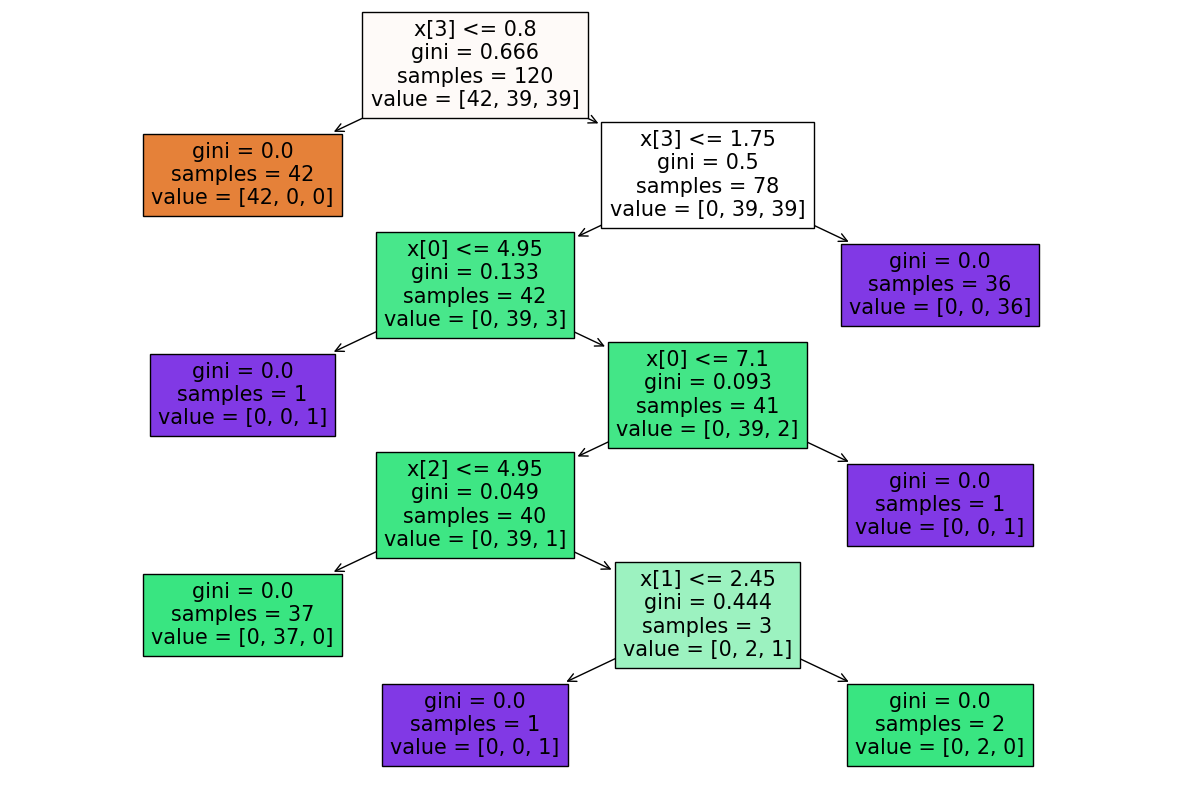

In [94]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier, filled= True)

In [95]:
y_pred = treeclassifier.predict(X_test)
y_pred

array([1, 1, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [97]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[8 0 0]
 [0 9 2]
 [0 2 9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.82      0.82        11
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Decision Tree classifier prepuring and hyperparameter tuning

In [98]:
param ={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [99]:
param

{'criterion': ['gini', 'entropy', 'log_loss'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2']}

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
treemodel = DecisionTreeClassifier()

In [102]:
grid = GridSearchCV(treeclassifier, param_grid=param, cv=5, scoring ='accuracy')

In [104]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [106]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [107]:
grid.best_index_

22

In [108]:
grid.best_score_

0.9666666666666668

In [109]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}